In [1]:
import module
import numpy as np
import matplotlib.pyplot as plt
#ausgangskennliniefeld
#variables 
Vds_start = 0
Vds_stop = 15
Vds_step = 0.1
Vds_comp = 0.1
time='MED'
    
Vgs_start = 2
Vgs_step = -4
Vgs_points = 4
Vgs_comp= 0.01
Vgs_pcomp = 0
    
device = module.HP4155a('GPIB0::17::INSTR')
    
#setup device
device.reset()
device.measurement_mode('SWE')

device.disable_vsu(1)
device.disable_vsu(2)
device.disable_vmu(1)
device.disable_vmu(2)
    
#smu1 
device.smu_vname(1,'VS1')
device.smu_iname(1,'IS1')
device.smu_mode_meas(1,'COMM')
device.smu_function_sweep(1,'CONS')
    
#smu2
device.smu_vname(2,'VDS')
device.smu_iname(2,'ID')
device.smu_mode_meas(2,'V')
device.smu_function_sweep(2,'VAR1')
    
#smu3
device.smu_vname(3,'VGS')
device.smu_iname(3,'IG')
device.smu_mode_meas(3,'V')
device.smu_function_sweep(3,'VAR2')
    
#smu4
device.smu_vname(4,'VS2')
device.smu_iname(4,'IS2')
device.smu_mode_meas(4,'COMM')
device.smu_function_sweep(4,'CONS')
    
#var1 and var2 setup
device.start_value_sweep(Vds_start)
device.step_sweep(Vds_step)
device.stop_value_sweep(Vds_stop)
device.comp('VAR1',Vds_comp)
    
#var2
device.var2_start(Vgs_start)
device.var2_points(Vgs_points)
device.var2_step(Vgs_step)
device.var2_comp(Vgs_comp)
device.var2_pcomp(Vgs_pcomp)
    
device.integration_time(time)
    
#user functions
device.user_function('ISmm','mA/mm','1E4*IS1')
device.user_function('IDmm','mA/mm','1E4*ID')
device.user_function('IGmm','mA/mm','1E4*IG')
device.user_function('IS2mm','mA/mm','1E4*IS2')
device.user_function('ABSIDm','mA/mm','ABS(IDmm)')
device.user_function('ABSIGm','mA/mm','ABS(IGmm)')
    
#display
device.display_variable('X','VDS')
device.display_variable('Y1','IDmm')
device.display_variable('Y2','IGmm')
    
device.single_measurement()
while device.operation_completed() == False:
    pass
        
device.autoscaling()
#return data from the device

In [2]:
Vds=device.return_data('VDS')
Idmm=device.return_data('IDmm')
Igmm=device.return_data('IGmm')

    
print(Vds)
print(Idmm)
print(Igmm)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8

In [3]:
Vds= np.array(Vds)
Vds = np.array_split(Vds,Vgs_points)

Idmm=np.array(Idmm)
Idmm = np.array_split(Idmm,Vgs_points)

Igmm=np.array(Igmm)
Igmm = np.array_split(Igmm,Vgs_points)

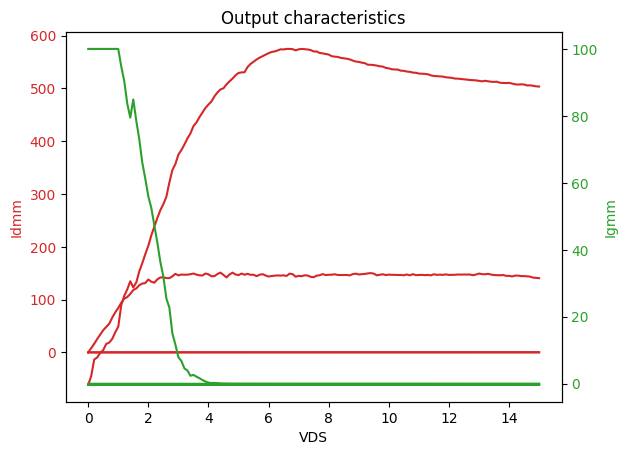

In [4]:
fig,ax1 = plt.subplots()
color='tab:red'
ax1.set_xlabel('VDS')
ax1.set_ylabel('Idmm',color=color)
ax1.tick_params(axis ='y', labelcolor = color)
for i in range(len(Vds)):
    ax1.plot(Vds[i],Idmm[i],color=color)
    
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Igmm', color = color) 
for i in range(len(Vds)):
    ax2.plot(Vds[i], Igmm[i], color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 

plt.title("Output characteristics")
plt.show()